In [7]:
using Images
include("ALBreIF/ALBreIF.jl")
import .ALBreIF

In [15]:
ul = "ORL_Faces/s1/1.pgm" # 读取图片
ig = load(ul)
a, b = size(ig) # 图片大小
R = 5
B = Matrix{Float64}(undef, a * b, 400)
for i = 1:40
    for j = 1:10
        local url = "ORL_Faces/s" * "$i/" * "$j" * ".pgm"
        local img = load(url)
        local q = float64.(channelview(img))
        q = q[:]
        global B[:, (i-1)*10+j] = q
    end
end

A = ALBreIF.normalize!(B)
X, Y = ALBreIF.randinit(A, R^2, 1.0, 1.0)

([0.001730747704057536 0.004986626085635137 … 0.004971491736659866 0.0002667121392820292; 0.0031408756500785075 0.002003894397153848 … 0.0030973928723640074 0.00035079315204085973; … ; 0.0024976471866076056 0.0006579299382786245 … 0.0045669561978171035 0.00475500572359849; 0.0033332269948437424 0.004247668583480511 … 0.0010785255932055972 0.0020823251748396557], [0.011715768329684888 0.004391629370773901 … 0.002725264490387996 0.016056889854575436; 0.0015236115090818162 0.01333214558308886 … 0.012167680935764168 0.02315273927466701; … ; 0.011675531572538563 0.013855062739021932 … 0.005186528384212573 0.011661825157766093; 0.023898364586343156 0.017853319225559952 … 0.011592315692254081 0.008056340528867504])

In [16]:
r = ALBreIF.solve!(ALBreIF.ABLBreI{Float64}(runtime=120,
        verbose=true,
        ρ=0.8,
        μ₁=0.01,
        μ₂=0.0), A, X, Y)

X = norm(B) .* X

Iter     Elapsed time     objv             objv.change      (X & Y).change
    0     0.000000e+00     1.000004e+00


   10     2.084000e+00     2.465964e-01    -7.534072e-01     5.244306e-03


   20     4.176000e+00     4.970081e-01     2.504117e-01     5.254265e-03


   30     6.086000e+00     9.991040e-01     5.020960e-01     1.023092e-03


   40     8.015000e+00     9.838556e-01    -1.524848e-02     2.086515e-03


   50     9.854000e+00     8.868697e-01    -9.698585e-02     2.446199e-03


   60     1.169300e+01     8.025529e-01    -8.431682e-02     2.214025e-03


   70     1.350800e+01     6.219894e-01    -1.805635e-01     2.029296e-03


   80     1.531700e+01     4.660176e-01    -1.559718e-01     1.603988e-03


   90     1.717800e+01     3.501704e-01    -1.158472e-01     2.216317e-03


  100     1.899100e+01     2.254391e-01    -1.247313e-01     2.907310e-03


  110     2.080600e+01     1.906272e-01    -3.481196e-02     1.802639e-03


  120     2.262400e+01     1.461676e-01    -4.445953e-02     2.390021e-03


  130     2.447200e+01     1.245007e-01    -2.166695e-02     1.069669e-03


  140     2.631200e+01     1.137656e-01    -1.073511e-02     1.506685e-03


  150     2.812100e+01     1.036200e-01    -1.014561e-02     1.608633e-03


  160     2.995100e+01     1.015548e-01    -2.065159e-03     9.015000e-04


  170     3.176900e+01     9.869502e-02    -2.859806e-03     1.190483e-03


  180     3.368500e+01     9.727644e-02    -1.418575e-03     6.230913e-04


  190     3.566200e+01     9.649075e-02    -7.856949e-04     7.675503e-04


  200     3.754600e+01     9.551884e-02    -9.719053e-04     8.520429e-04


  210     3.939800e+01     9.523853e-02    -2.803091e-04     5.076144e-04


  220     4.124600e+01     9.476035e-02    -4.781831e-04     6.797984e-04


  230     4.312000e+01     9.442871e-02    -3.316349e-04     3.831149e-04


  240     4.503200e+01     9.419431e-02    -2.344073e-04     4.412471e-04


  250     4.686900e+01     9.385465e-02    -3.396541e-04     5.178679e-04


  260     4.872600e+01     9.371216e-02    -1.424948e-04     3.021253e-04


  270     5.061200e+01     9.348826e-02    -2.239018e-04     4.647895e-04


  280     5.250300e+01     9.330968e-02    -1.785797e-04     2.574585e-04


  290     5.444800e+01     9.316571e-02    -1.439659e-04     2.802814e-04


  300     5.631000e+01     9.296064e-02    -2.050742e-04     3.509048e-04


  310     5.818900e+01     9.284609e-02    -1.145515e-04     2.108544e-04


  320     6.003500e+01     9.268458e-02    -1.615101e-04     3.695219e-04


  330     6.188100e+01     9.254695e-02    -1.376235e-04     2.213747e-04


  340     6.376600e+01     9.242573e-02    -1.212236e-04     1.975077e-04


  350     6.562200e+01     9.225779e-02    -1.679403e-04     2.651473e-04


  360     6.748000e+01     9.214764e-02    -1.101463e-04     1.861342e-04


  370     6.932300e+01     9.200037e-02    -1.472757e-04     3.500989e-04


  380     7.118000e+01     9.187370e-02    -1.266647e-04     2.506148e-04


  390     7.305900e+01     9.175589e-02    -1.178162e-04     1.742862e-04


  400     7.492800e+01     9.159516e-02    -1.607208e-04     2.217726e-04


  410     7.676600e+01     9.148143e-02    -1.137316e-04     1.930399e-04


  420     7.865700e+01     9.133112e-02    -1.503157e-04     3.824436e-04


  430     8.049100e+01     9.120473e-02    -1.263849e-04     2.800639e-04


  440     8.238000e+01     9.108256e-02    -1.221715e-04     1.733058e-04


  450     8.423400e+01     9.091590e-02    -1.666609e-04     2.116821e-04


  460     8.610100e+01     9.079464e-02    -1.212597e-04     2.112770e-04


  470     8.793600e+01     9.063224e-02    -1.623996e-04     4.214198e-04


  480     8.976100e+01     9.050106e-02    -1.311807e-04     3.054598e-04


  490     9.164900e+01     9.037005e-02    -1.310092e-04     1.735751e-04


  500     9.351400e+01     9.018920e-02    -1.808520e-04     2.104588e-04


  510     9.538000e+01     9.005733e-02    -1.318659e-04     2.273177e-04


  520     9.723800e+01     8.987508e-02    -1.822507e-04     4.675231e-04


  530     9.907200e+01     8.973505e-02    -1.400338e-04     3.299951e-04


  540     1.009790e+02     8.959107e-02    -1.439731e-04     1.748165e-04


  550     1.030080e+02     8.938801e-02    -2.030622e-04     2.130362e-04


  560     1.050140e+02     8.924249e-02    -1.455180e-04     2.428673e-04


  570     1.070080e+02     8.903269e-02    -2.098060e-04     5.199329e-04


  580     1.089090e+02     8.888009e-02    -1.525998e-04     3.550136e-04


  590     1.108210e+02     8.871907e-02    -1.610147e-04     1.768835e-04


  600     1.128860e+02     8.848543e-02    -2.336483e-04     2.182883e-04


  610     1.149720e+02     8.832352e-02    -1.619095e-04     2.583948e-04


  620     1.168760e+02     8.807838e-02    -2.451365e-04     5.780526e-04


  630     1.187660e+02     8.790928e-02    -1.690988e-04     3.815352e-04


10304×25 Matrix{Float64}:
 0.0       0.726668  0.254366  0.862584   …  0.0        2.83815    0.0
 0.281549  0.0       0.0       0.0           2.99287    1.73203    0.0
 0.0       0.0       0.0       0.512897      0.0        1.15273    0.0
 1.2389    0.754975  0.0       0.0           2.37712    1.46592    0.582119
 0.0       0.494323  0.0       0.158858      2.33175    2.68961    1.37636
 0.88559   0.62439   0.0       0.0        …  2.51963    1.6442     3.03599
 1.0249    0.0       1.06862   0.0           1.34124    0.0        0.359427
 0.0       0.0       0.0       0.996878      3.10572    3.13594    0.0
 0.0       0.0       0.915693  0.0           3.07751    0.266132   0.0
 0.0       0.0       0.142703  0.0           3.02376    1.15523    2.94714
 ⋮                                        ⋱                        
 0.0       0.0       0.0       0.0        …  2.8185     0.0        0.0
 0.111839  0.0       0.0       0.0           0.0        0.0        2.51667
 0.0       0.33848   0.10048

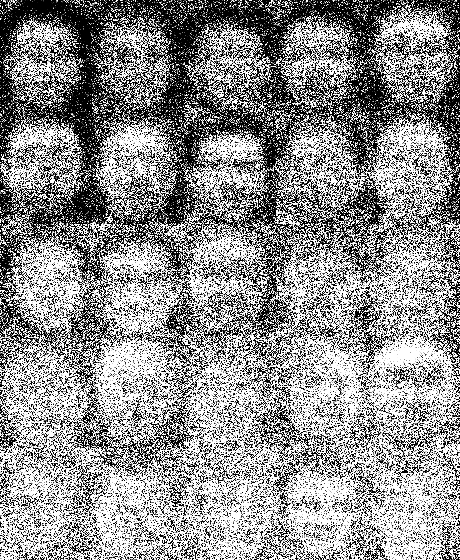

In [17]:
ViewW = Array{Gray{Float64},2}(undef, a * R, b * R)
for k = 0 : R^2-1
    local w = X[:, k+1]
    local m = reshape(w, a, b)
    local m = float(Gray.(m))
    local i = div(k, R)
    local j = mod(k, R)
    ViewW[i*a+1:(i+1)*a, j*b+1:(j+1)*b] = m
end

ViewW

In [18]:
#计算矩阵A中非零元素的比例
function non_zero_ratio(A)
    return sum(A .!= 0) / length(A)
end
non_zero_ratio(r.X)

0.6840877329192546